<div class="head0">
    <div class="head0__name">
        Diffusion equation with linear drift in 1D case
    </div>
    <div class="head0__note">
        Solution of the 1D Fokker-Planck equation by fast and accurate tensor based method with linear drift (Ornstein–Uhlenbeck process). Check for the 1th order solver.
    </div>
</div>

In [2]:
import sys
import time

import numpy as np
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.append('./../lib')
from intertrain import Intertrain
from solver import Solver as Solver1
from solver_tmp import SolverTmp as Solver2
from config import config

from IPython.core.display import HTML
with open( './style.css', 'r' ) as f: st = f.read()
HTML('<style>%s</style>' %st)

<div class="head1">
    <div class="head1__name">
        Parameters
    </div>
</div>

In [3]:
A = 1.
s = 1.
Dc = 0.5

def func_f0(x, t):
    m = 0.
    return A * (m - x)

def func_f1(x, t):
    return -A * np.ones(x.shape)

def func_xm(t, x0):
    return np.exp(-A * t) * x0
 
def func_xc(t):
    return (1. - np.exp(-2. * A * t)) / 2. / A

def func_r0(x):
    m = 0.
    r = np.exp(-0.5 * (x - m)**2 / s) / np.sqrt(2. * np.pi * s)
    return r.reshape(-1)

def func_rx(x, t, x0):
    m = func_xm(t, x0)
    c = func_xc(t)
    r = np.exp(-0.5 * (x - m)**2 / c) / np.sqrt(2. * np.pi * c)
    return r.reshape(-1)

def func_rt(x, t):
    S = func_xc(t) + s * np.exp(-2. * A * t)
    r = np.exp(-0.5 * x**2 / S) / np.sqrt(2. * np.pi * S)
    return r.reshape(-1)

def func_rs(x):
    r = np.sqrt(A / np.pi) * np.exp(- A * x * x)
    return r.reshape(-1)

In [5]:
t_poi = 1000
t_min = 0.
t_max = 1.

x_poi = 500
x_min = -5.
x_max = +5.

m = t_poi
n = x_poi
l = (x_max - x_min) / x_poi
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

print('Time-space factor (h/l^2) : %-8.5f'%(h/l/l))

Time-space factor (h/l^2) : 2.50250 


<div class="head1">
    <div class="head1__name">
        Computations
    </div>
</div>

In [6]:
M = [10, 100, 1000, 10000, 100000]
N = list(np.arange(10, 51, 5, dtype=int))
E = {}
T = {}

def calc(SL, m, n):
    if not E.get(m): E[m] = []
    if not T.get(m): T[m] = []
        
    SL.set_grid_t(m, t_min, t_max, t_hst=1)
    SL.set_grid_x(n, x_min, x_max)
    SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SL.set_coefs(Dc)
    SL.prep()
    SL.calc()

    T[m].append([SL._t_prep, SL._t_calc, SL._t_spec])
    E[m].append(SL._err)
        
for m in M:
    for n in list(N):
        print('----- Computation | m = %-6d | n = %-6d'%(m, n))
        time.sleep(1)
        calc(Solver1(d=1), m, n)

----- Computation | m = 10     | n = 10    


Solve: 100%|█| 9/9 [00:00<00:00, 1142.00step/s, | At T = 1.00e+00 : error = 1.80e-01]


----- Computation | m = 10     | n = 15    


Solve: 100%|█| 9/9 [00:00<00:00, 787.48step/s, | At T = 1.00e+00 : error = 6.76e-02]


----- Computation | m = 10     | n = 20    


Solve: 100%|█| 9/9 [00:00<00:00, 438.40step/s, | At T = 1.00e+00 : error = 5.47e-02]


----- Computation | m = 10     | n = 25    


Solve: 100%|█| 9/9 [00:00<00:00, 672.34step/s, | At T = 1.00e+00 : error = 5.61e-02]


----- Computation | m = 10     | n = 30    


Solve: 100%|█| 9/9 [00:00<00:00, 693.59step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 35    


Solve: 100%|█| 9/9 [00:00<00:00, 371.15step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 40    


Solve: 100%|█| 9/9 [00:00<00:00, 333.50step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 45    


Solve: 100%|█| 9/9 [00:00<00:00, 554.12step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 50    


Solve: 100%|█| 9/9 [00:00<00:00, 372.32step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 100    | n = 10    


Solve: 100%|█| 99/99 [00:00<00:00, 1789.84step/s, | At T = 1.00e+00 : error = 2.40e-01]


----- Computation | m = 100    | n = 15    


Solve: 100%|█| 99/99 [00:00<00:00, 1411.01step/s, | At T = 1.00e+00 : error = 1.10e-01]


----- Computation | m = 100    | n = 20    


Solve: 100%|█| 99/99 [00:00<00:00, 1318.96step/s, | At T = 1.00e+00 : error = 6.81e-03]


----- Computation | m = 100    | n = 25    


Solve: 100%|█| 99/99 [00:00<00:00, 814.05step/s, | At T = 1.00e+00 : error = 5.56e-03]


----- Computation | m = 100    | n = 30    


Solve: 100%|█| 99/99 [00:00<00:00, 1009.89step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 35    


Solve: 100%|█| 99/99 [00:00<00:00, 350.69step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 40    


Solve: 100%|█| 99/99 [00:00<00:00, 628.98step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 45    


Solve: 100%|█| 99/99 [00:00<00:00, 395.60step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 50    


Solve: 100%|█| 99/99 [00:00<00:00, 448.85step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 1000   | n = 10    


Solve: 100%|█| 999/999 [00:00<00:00, 1970.28step/s, | At T = 1.00e+00 : error = 2.49e-01]


----- Computation | m = 1000   | n = 15    


Solve: 100%|█| 999/999 [00:00<00:00, 1340.84step/s, | At T = 1.00e+00 : error = 1.13e-01]


----- Computation | m = 1000   | n = 20    


Solve: 100%|█| 999/999 [00:00<00:00, 1249.70step/s, | At T = 1.00e+00 : error = 6.18e-03]


----- Computation | m = 1000   | n = 25    


Solve: 100%|█| 999/999 [00:00<00:00, 1196.93step/s, | At T = 1.00e+00 : error = 9.93e-04]


----- Computation | m = 1000   | n = 30    


Solve: 100%|█| 999/999 [00:00<00:00, 1034.68step/s, | At T = 1.00e+00 : error = 5.49e-04]


----- Computation | m = 1000   | n = 35    


Solve: 100%|█| 999/999 [00:01<00:00, 764.26step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 40    


Solve: 100%|█| 999/999 [00:01<00:00, 802.26step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 45    


Solve: 100%|█| 999/999 [00:01<00:00, 671.54step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 50    


Solve: 100%|█| 999/999 [00:01<00:00, 670.50step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 10000  | n = 10    


Solve: 100%|█| 9999/9999 [00:04<00:00, 2080.95step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 10000  | n = 15    


Solve: 100%|█| 9999/9999 [00:07<00:00, 1362.12step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 10000  | n = 20    


Solve: 100%|█| 9999/9999 [00:06<00:00, 1446.73step/s, | At T = 1.00e+00 : error = 6.33e-03]


----- Computation | m = 10000  | n = 25    


Solve: 100%|█| 9999/9999 [00:08<00:00, 1213.64step/s, | At T = 1.00e+00 : error = 8.32e-04]


----- Computation | m = 10000  | n = 30    


Solve: 100%|█| 9999/9999 [00:09<00:00, 1064.49step/s, | At T = 1.00e+00 : error = 6.46e-05]


----- Computation | m = 10000  | n = 35    


Solve: 100%|█| 9999/9999 [00:10<00:00, 935.62step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 40    


Solve: 100%|█| 9999/9999 [00:12<00:00, 832.57step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 45    


Solve: 100%|█| 9999/9999 [00:13<00:00, 745.57step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 50    


Solve: 100%|█| 9999/9999 [00:14<00:00, 673.17step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 100000 | n = 10    


Solve: 100%|█| 99999/99999 [00:43<00:00, 2322.23step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 100000 | n = 15    


Solve: 100%|█| 99999/99999 [00:56<00:00, 1766.85step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 100000 | n = 20    


Solve: 100%|█| 99999/99999 [01:09<00:00, 1444.43step/s, | At T = 1.00e+00 : error = 6.35e-03]


----- Computation | m = 100000 | n = 25    


Solve: 100%|█| 99999/99999 [01:22<00:00, 1218.79step/s, | At T = 1.00e+00 : error = 8.30e-04]


----- Computation | m = 100000 | n = 30    


Solve: 100%|█| 99999/99999 [01:35<00:00, 1047.59step/s, | At T = 1.00e+00 : error = 3.54e-05]


----- Computation | m = 100000 | n = 35    


Solve: 100%|█| 99999/99999 [01:47<00:00, 935.78step/s, | At T = 1.00e+00 : error = 5.46e-06]


----- Computation | m = 100000 | n = 40    


Solve: 100%|█| 99999/99999 [02:01<00:00, 819.98step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Computation | m = 100000 | n = 45    


Solve: 100%|█| 99999/99999 [02:13<00:00, 749.63step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Computation | m = 100000 | n = 50    


Solve: 100%|█| 99999/99999 [02:26<00:00, 681.54step/s, | At T = 1.00e+00 : error = 5.18e-06]


<div class="head1">
    <div class="head1__name">
        Results
    </div>
</div>

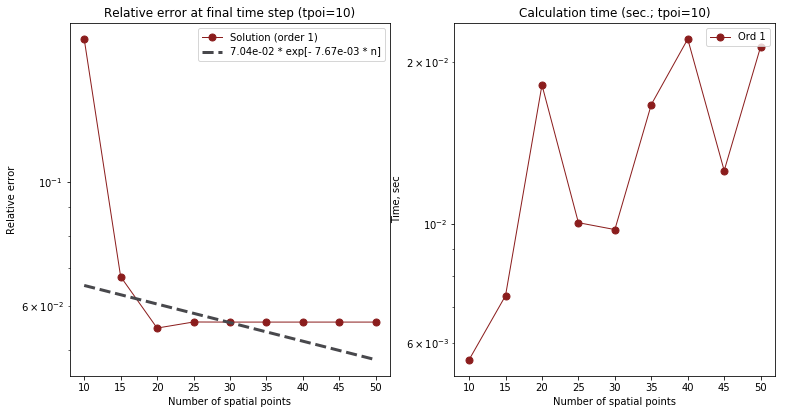

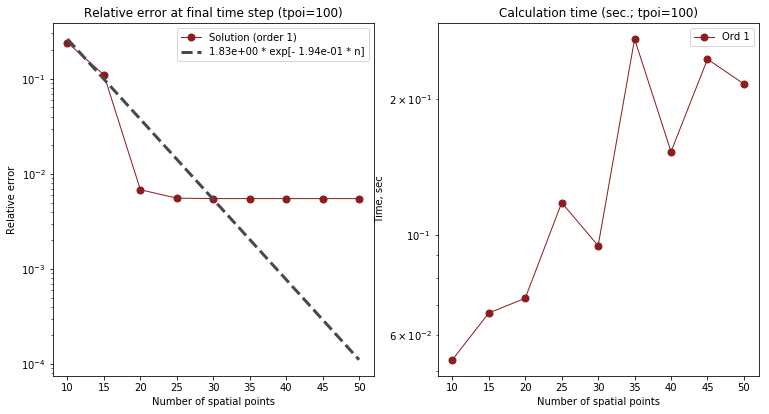

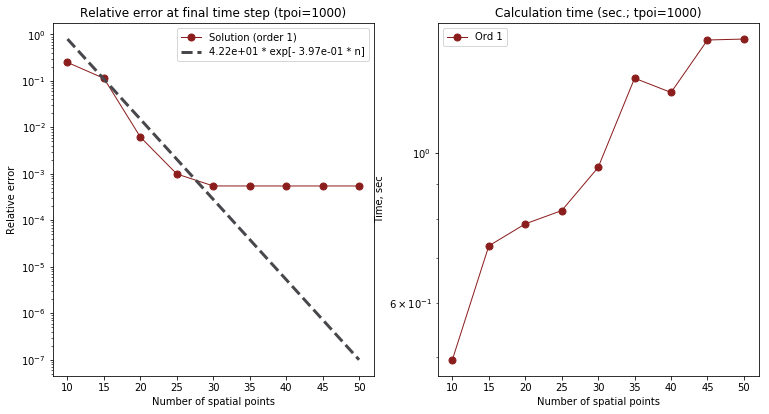

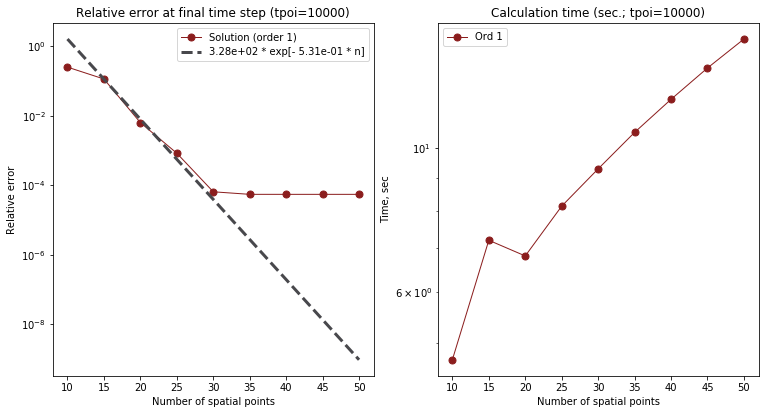

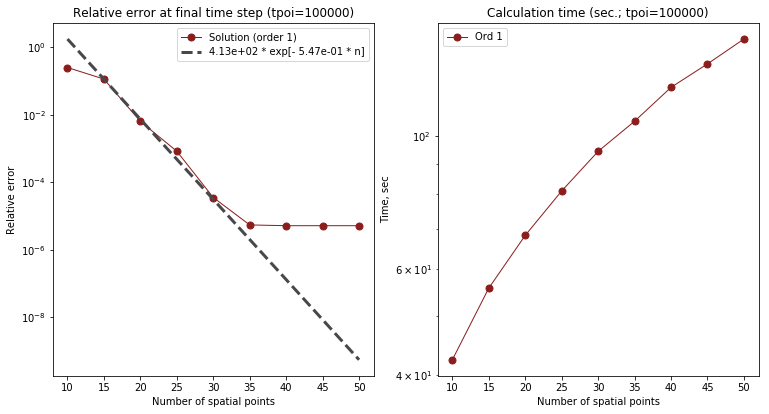

In [15]:
def show(m, lims):  
    x = np.array(N.copy())
    y = np.array(E[m].copy())
    t = T[m].copy()

    xe = x[lims[m][0]:lims[m][1]]
    ye = y[lims[m][0]:lims[m][1]]

    b, a = np.polyfit(xe, np.log(ye), 1, w=np.sqrt(ye))
    a = np.exp(a)
    z1 = a * np.exp(b * x)

    fig = plt.figure(**config['plot']['fig']['base_1_2'])
    grd = mpl.gridspec.GridSpec(**config['plot']['grid']['base_1_2'])
    ax1 = fig.add_subplot(grd[0, 0])
    ax2 = fig.add_subplot(grd[0, 1])

    opts = config['plot']['line']['calc'].copy()
    opts['label'] = 'Solution (order 1)'
    ax1.plot(x, y, **opts)

    opts = config['plot']['line']['init'].copy()
    opts['label'] = '%8.2e * exp[- %8.2e * n]'%(a, -b)
    ax1.plot(x, z1, **opts)

    ax1.set_title('Relative error at final time step (tpoi=%d)'%m)
    ax1.set_xlabel('Number of spatial points')
    ax1.set_ylabel('Relative error')
    ax1.legend(loc='best')
    ax1.semilogy()

    opts = config['plot']['line']['calc'].copy()
    opts['label'] = 'Ord 1'
    ax2.plot(N, [t_[1] for t_ in t], **opts)
    ax2.semilogy()
    ax2.set_title('Calculation time (sec.; tpoi=%d)'%m)
    ax2.set_xlabel('Number of spatial points')
    ax2.set_ylabel('Time, sec')
    ax2.legend(loc='best')

    plt.show()
      
for m in M:
    show(m, {
        10: [1, 6],
        100: [1, 6],
        1000: [1, 6],
        10000: [1, 6],
        100000: [1, 6],
    })

<div class="end"></div>